In [147]:
import dpkt
import csv
import matplotlib.pyplot as plt
f = open("pcaplab.pcap", "rb")
pcap  =  dpkt.pcap.Reader(f) 

In [148]:
rows = []
tslist = []
acklist = []
for ts, buf in pcap: 

    eth = dpkt.ethernet.Ethernet(buf) 

# This grabs the layer 3 (IP) object 
#  ... from inside the Ethernet frame 
# First we only want to consider IP packets 
#   ... there are likely some non-IP ethernet frames 
    
    if eth.type == dpkt.ethernet.ETH_TYPE_IP: 
        ip = eth.data 
        
# Now we check and see if the protocol inside the IP packet 
#  ... Is actually TCP 
    

    if ip.p == dpkt.ip.IP_PROTO_TCP and dpkt.utils.inet_to_str(ip.dst) == "52.206.140.199":
        tcp = ip.data 

        if tcp.sport == 54949:
            rows.append([ts, tcp.ack])
            tslist.append(ts)
            acklist.append(tcp.ack)

            
    
# Here we can then do something with the  the TCP header

In [149]:
# creates the csv file with two columns: time field and the number 
# of bytes that have been acknowledged by your machine
fields = ['timestamp', 'acknowledgement']
csvfile = "pcaps.csv"

with open(csvfile, "w") as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    writer.writerows(rows)

In [150]:
# countdict keeps track of the number of duplicate acknowledgements
countdict = {}
for i in range(len(rows)):
    if rows[i][1] in countdict.keys():
        countdict[rows[i][1]] += 1
    countdict.setdefault(rows[i][1], 1)

for key in countdict.keys():
    print("acknowledgement number:", key, "| occurence: ", countdict[key])


acknowledgement number: 0 | occurence:  1
acknowledgement number: 3529766834 | occurence:  2
acknowledgement number: 3529769598 | occurence:  1
acknowledgement number: 3529770075 | occurence:  2
acknowledgement number: 3529770333 | occurence:  1
acknowledgement number: 3529770826 | occurence:  10


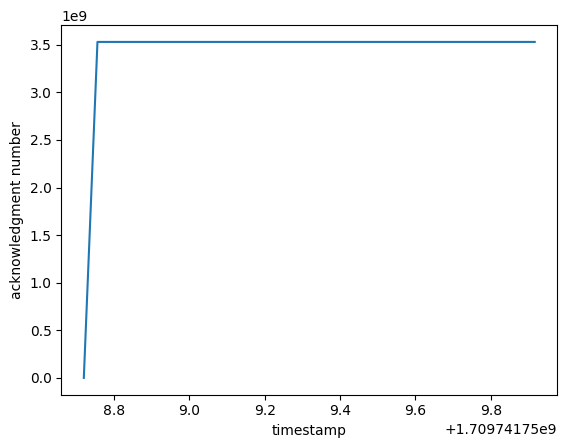

In [151]:
# acknowledgement number over time
plt.plot(tslist, acklist, label='Loaded from file!')
plt.xlabel('timestamp')
plt.ylabel('acknowledgment number')
plt.show()

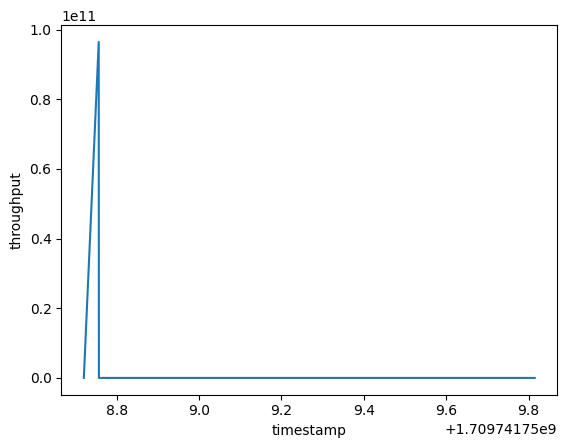

In [152]:
# throughput over time
throughputlist = []
tsl = []
for i in range(len(rows) - 1):
    y = (rows[i+1][1] - rows[i-1][1]) / (rows[i+1][0] - rows[i-1][0])
    throughputlist.append(y)
    tsl.append(rows[i][0])

plt.plot(tsl, throughputlist, label='Loaded from file!')
plt.xlabel('timestamp')
plt.ylabel('throughput')
plt.show()
